## Analisando DF ficticio de diabetes - Estudo de EDA e machine learning

#### Importações necessárias


In [367]:
# Bibliotecas para analise/manipulação do DF
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Biblioteca para desenvolvimento do modelo preditivo
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

print('Todas bibliotecas foram carregadas.')


Todas bibliotecas foram carregadas.


#### Visualização e pré processamento da base

In [329]:
base = pd.read_csv('datasets/diabetes.csv')
base.head()

,Sexo,Idade,Peso,Altura,Resultado
0,F,76,88.8,1.62,92
1,M,77,103.6,1.70,133
2,F,75,63.4,1.64,125
3,M,47,70.0,1.87,82
4,F,28,114.4,1.58,106


In [330]:
base.sample(3)

,Sexo,Idade,Peso,Altura,Resultado
50,M,28,62.0,1.83,81
43,M,35,111.1,1.51,127
2,F,75,63.4,1.64,125


In [331]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sexo       100 non-null    object 
 1   Idade      100 non-null    int64  
 2   Peso       100 non-null    float64
 3   Altura     100 non-null    float64
 4   Resultado  100 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 4.0+ KB


In [332]:
base.columns.tolist()

['Sexo', 'Idade', 'Peso', 'Altura', 'Resultado']

In [333]:
base.isna().sum()

Sexo         0
Idade        0
Peso         0
Altura       0
Resultado    0
dtype: int64

In [334]:
base.duplicated().sum()

np.int64(0)

In [335]:
# Pela análise inicial o DataFrame está em perfeitas condições para trabalharmos.
# Podendo ser ajustado apenas a coluna 'sexo' para categorica.

In [336]:
base['Sexo'] = base['Sexo'].astype('category')

In [337]:
# Para facilitar o trabalho,todas as colunas para lower(minusculo)

In [338]:
base.columns = base.columns.str.lower()

###  EDA - Analise exploratoria de dados

##### Análise univariada

In [339]:
base.columns.tolist()

['sexo', 'idade', 'peso', 'altura', 'resultado']

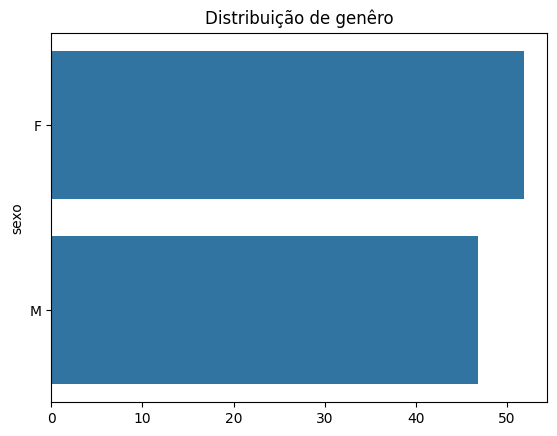

sexo
F    53
M    47
Name: count, dtype: int64


In [340]:
plt.title('Distribuição de genêro')
fig1 = sns.barplot(base['sexo'], errorbar=None)
plt.show(fig1)
print(base['sexo'].value_counts())

In [ ]:
# Grafico indica que o DF está bem dividido, sendo 53% mulheres e 47%  homens

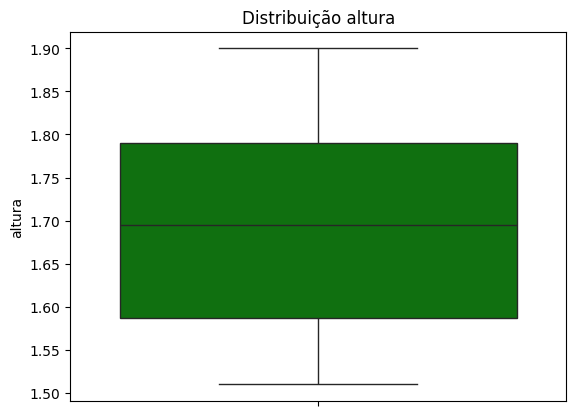

count    100.00000
mean       1.69520
std        0.11592
min        1.51000
25%        1.58750
50%        1.69500
75%        1.79000
max        1.90000
Name: altura, dtype: float64


In [341]:
plt.title('Distribuição altura')
fig2 = sns.boxplot(base['altura'], color='green')

plt.show(fig2)
print(base['altura'].describe())

In [ ]:
# podemos observar que a media de altura é 1.69, sendo 1.90 a pessoa mais alta e 
# 1.51 a pessoa mais baixa.

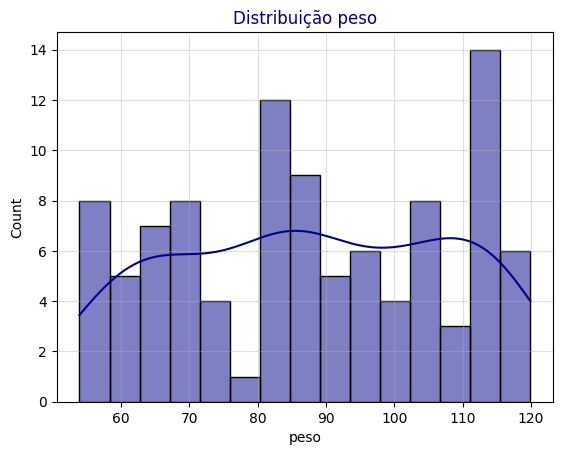

In [342]:
plt.title('Distribuição peso', color='darkblue')
fig3 = sns.histplot(base['peso'], color='darkblue', kde=True, bins=15)
plt.grid(linestyle='-', alpha=0.4)
plt.show(fig3)

In [ ]:
# Observamos que há uma grande quantidade de pessoas entre 80 e 90 quilos, mas também acima de 110.
# vamos observar mais afundo

In [343]:
base['peso'].describe()

count    100.000000
mean      87.799000
std       19.828077
min       53.900000
25%       70.000000
50%       86.300000
75%      105.400000
max      119.900000
Name: peso, dtype: float64

In [344]:
base.loc[base['peso'] >= 110 ].shape[0]

21

In [ ]:
# 21% das pessoas desse DF tem mais de 110kg, sendo um alto indice

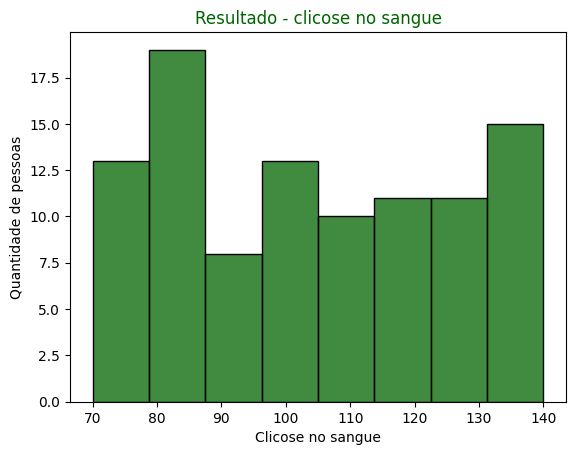

In [345]:
plt.title('Resultado - clicose no sangue', color='darkgreen')

fig4 = sns.histplot(base['resultado'], color='darkgreen')

plt.xlabel('Clicose no sangue')
plt.ylabel('Quantidade de pessoas')
plt.show(fig4)

### Análise bi/mult variada e correlações

In [346]:
base.sexo

0     F
1     M
2     F
3     M
4     F
     ..
95    M
96    F
97    M
98    M
99    F
Name: sexo, Length: 100, dtype: category
Categories (2, object): ['F', 'M']

In [347]:
# criando DF número para analise de correlações
sexo_numeric = pd.Series(np.where(base['sexo'] == 'M', 0, 1))


In [348]:
base_numeric = base.copy()

In [349]:
base_numeric['sexo'] = sexo_numeric
base_numeric.sample(10)

,sexo,idade,peso,altura,resultado
43,0,35,111.1,1.51,127
88,0,26,68.3,1.74,110
45,1,48,105.4,1.69,74
91,1,50,85.3,1.59,117
66,1,50,74.0,1.59,116
50,0,28,62.0,1.83,81
63,1,73,97.2,1.73,109
52,1,69,85.8,1.72,100
74,1,52,92.5,1.56,86
54,1,23,82.1,1.82,71


In [354]:
# criando coluna IMC
base_numeric['imc'] = (base['peso'] / ((base['altura'] /100)** 2))
base['imc'] = (base['peso'] / ((base['altura'] /100)** 2))

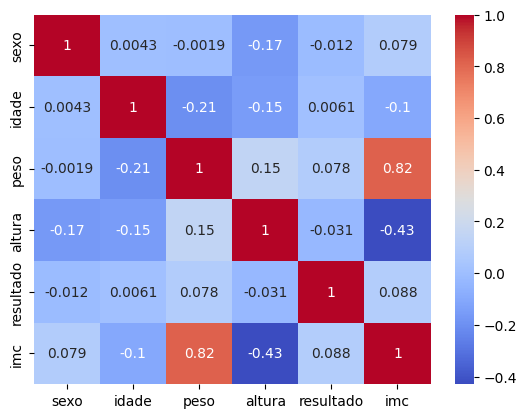

In [351]:
#plt.figure(figsize=(10,8))
fig5 = sns.heatmap(base_numeric.corr(), annot=True, cmap='coolwarm')

plt.show(fig5)



<Axes: >

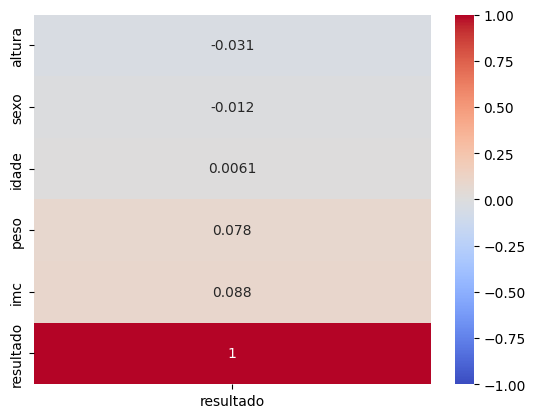

In [355]:
sns.heatmap(base_numeric.corr()[['resultado']].sort_values(by='resultado'), annot=True, 
            cmap='coolwarm', vmin=-1, vmax=1)

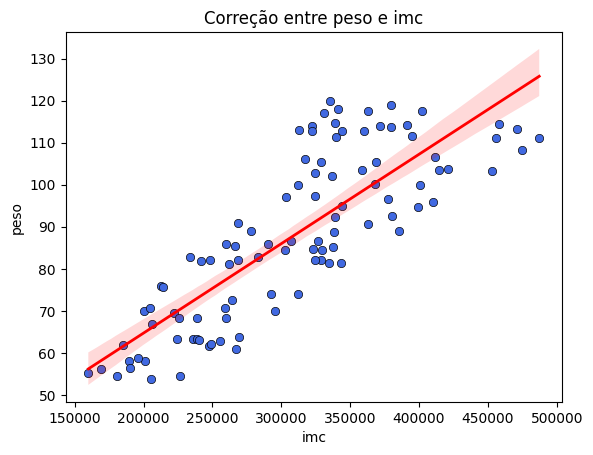

In [356]:
plt.title('Correção entre peso e imc')
sns.scatterplot(x='imc', y='peso', data=base_numeric, 
                 edgecolor='black', color='royalblue')

sns.regplot(x='imc', y='peso', data=base_numeric, 
            scatter=False, color='red', line_kws={'linewidth': 2}, label='Tendência')
plt.show()

In [357]:
# Seguindo com a base principal. 
# Vamos criar um modelo de predição de regressão linear, sendo assim podemos usar
# apenas variaveis númericas. Mas, para não influenciar vamos realizar um 'one-hot encoding' (criando)
# duas novas variaveis e preenchendo com 0 ou 1

print('Estado atual')
base.sample(3)

Estado atual


,sexo,idade,peso,altura,resultado,imc
4,F,28,114.4,1.58,106,458259.894248
48,M,59,62.2,1.58,93,249158.788656
83,M,31,100.0,1.58,130,400576.830636


array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'resultado'}>],
       [<Axes: title={'center': 'imc'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

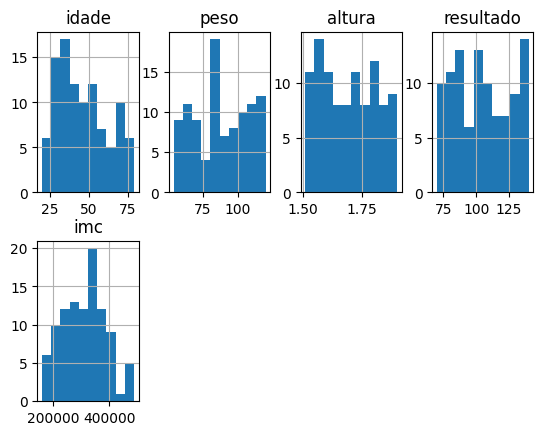

In [358]:
base.hist(layout = (2,4))

In [359]:
base = pd.get_dummies(data=base, columns=['sexo'], dtype='int')

In [361]:
print('Estado já modificado')
base.sample(10)

Estado já modificado


,idade,peso,altura,resultado,imc,sexo_F,sexo_M
45,48,105.4,1.69,74,369034.697665,1,0
52,69,85.8,1.72,100,290021.633315,1,0
30,31,99.9,1.79,135,311788.021597,1,0
81,73,117.1,1.88,104,331315.074694,0,1
40,69,58.1,1.75,74,189714.285714,0,1
48,59,62.2,1.58,93,249158.788656,0,1
99,49,70.8,1.86,137,204647.936178,1,0
4,28,114.4,1.58,106,458259.894248,1,0
97,54,86.0,1.82,127,259630.479411,0,1
68,34,82.1,1.59,100,324749.812112,1,0


#### Iniciando o modelo de previsão de diabetes - REGRESSÃO LINEAR

In [368]:
# model 1 - sem imc

In [458]:
X = base.drop(columns=['imc', 'resultado']) # Tirando a variavel que quero prever e imc
y = base['resultado'] # variavel de previsao

In [459]:
# Dividir conjunto de dados entre treino e teste

In [460]:
X_train, X_teste, y_train, y_teste= train_test_split(X, y, train_size=0.7, random_state=25)

In [461]:
# Treinar o modelo 1 - sem imc

In [462]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [463]:
# Gerar predições

In [464]:
y_pred = model_1.predict(X_teste)

In [465]:
y_pred

array([104.39975621, 103.55025272, 105.16394636, 103.57371417,
       105.0504163 , 103.33880616, 106.23788016, 104.54627395,
       106.89552785, 103.62335469, 104.86150261, 104.59212024,
       107.25604455, 104.35102969, 103.95210785, 104.61784373,
       106.96945344, 105.33272898, 105.7637508 , 104.90396153,
       106.14837071, 106.00873344, 105.38413847, 103.61675152,
       103.66450459, 103.61669197, 104.34591549, 104.31196108,
       106.0176228 , 104.43575854])

In [466]:
# Metrics r2_score

model_1.score(X_train, y_train) # teste

0.003298952784562048

In [467]:
model_1.score(X_teste, y_teste) # real 

-0.012980656935233315

In [468]:
r2_score(y_teste, y_pred)

-0.012980656935233315

In [469]:
# metric MAE

In [470]:
mean_absolute_error(y_teste, y_pred) # escala de 18 para mais ou menos da reta

16.784238703714117

In [471]:
# model 2 com imc

In [472]:
x2 = pd.DataFrame(base['imc'])
y2 = base['resultado']

In [473]:
X_train2, X_teste2, y_train2, y_teste2 = train_test_split(x2, y2, train_size=0.7, random_state=25 )

In [474]:
model_2 = LinearRegression()
model_2.fit(X_train2, y_train2)

LinearRegression()

In [475]:
y_pred2 = model_2.predict(X_teste2)

In [476]:
model_2.score(X_train2, y_train2)

0.0021236290770169086

In [477]:
model_2.score(X_teste2, y_teste2)

-0.01029234957348768

In [478]:
r2_score(y_teste2, y_pred2)

-0.01029234957348768

In [479]:
mean_absolute_error(y_teste2, y_pred2)

16.71083656177807